In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters
from skimage import img_as_float


def print_image(*images,titles= None,columns = None):
    # create figure 
    fig = plt.figure(figsize=(10, 8)) 
    
    # setting values to rows and column variables 
    if columns == None:
         columns = len(images)
         rows = 1
    else: 
        a, b = divmod(len(images),columns)
        if b>0:
              rows = a
        else: rows = a+1
    
    for image in images:
        if titles == None:
             title = ""
        # Adds a subplot at the 1st position 
        fig.add_subplot(rows, columns, 1) 
        
        # showing image 
        plt.imshow(image) 
        plt.axis('off') 
        plt.title(title) 

def image_inversion(image):
        return (255-image)

def preprocessing(image):
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    median_image = cv2.medianBlur(gray_image,3)
    img_contrasty_post_median = cv2.convertScaleAbs(median_image, 1.9, 1)
    return img_contrasty_post_median

def contours_binary_transformation(gray_image,tr_min=200,tr_max=255):
    th, binary_image = cv2.threshold(gray_image, tr_min, tr_max, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(image_inversion(binary_image), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours,binary_image

def bounding_box_image(contours,image):
    image_with_contours = image.copy()
    for contour in contours:
        # Get the bounding box around the contour
        x, y, w, h = cv2.boundingRect(contour)

        # Draw the bounding box
        cv2.rectangle(image_with_contours, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display dimensions near the bounding box
        cv2.putText(image_with_contours, f"{w} x {h}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return image_with_contours


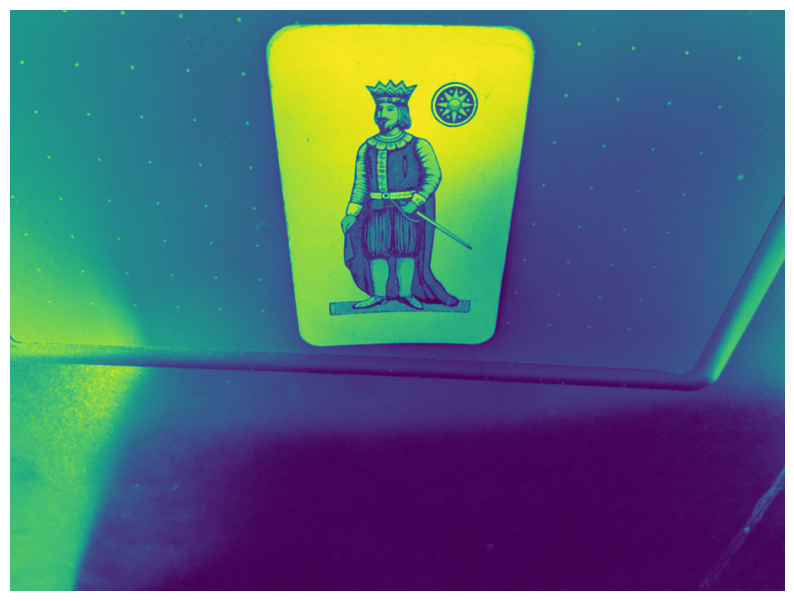

In [2]:
template_image = cv2.imread('Images/Cards/RO.jpg')
template_image = preprocessing(template_image)

environment_image_color = cv2.imread('Images/Tests/ROTavolo.jpg')
environment_image_preprocessed = preprocessing(environment_image_color)
print_image(environment_image_preprocessed)


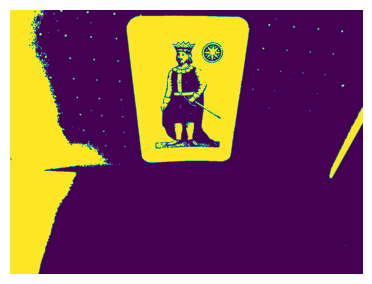

In [3]:
enviroment_contours, enviroment_binary = contours_binary_transformation(environment_image_preprocessed,tr_min=120,tr_max=255)
print_image(bounding_box_image(enviroment_contours,environment_image_color),enviroment_binary)


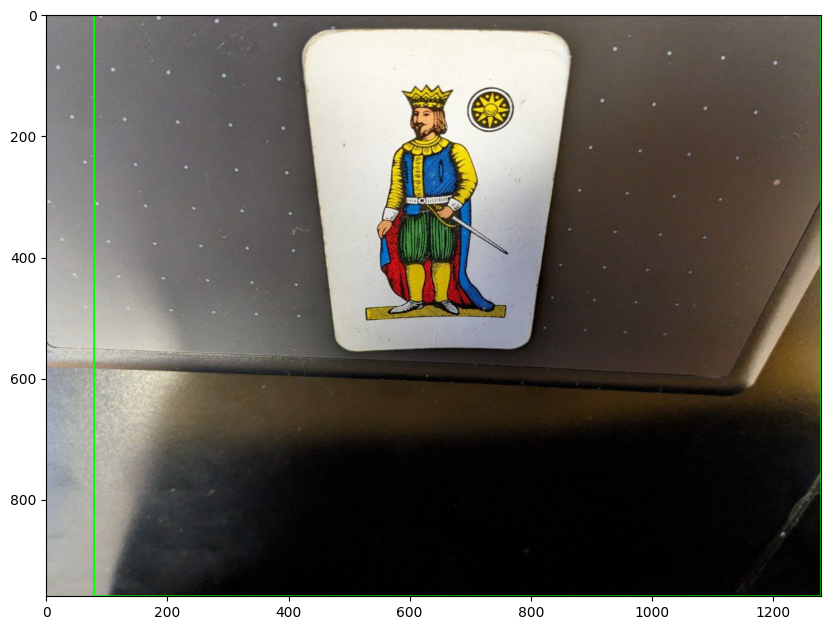

In [ ]:
enviroment_contours_sorted = sorted(enviroment_contours, key=lambda x: cv2.contourArea(x))
enviroment_contours_sorted.reverse()
print_image(bounding_box_image(enviroment_contours_sorted[0:1],environment_image_color))


In [ ]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(template_image,None)
kp2, des2 = sift.detectAndCompute(environment_image_color,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(template_image,kp1,environment_image_color,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

NameError: name 'environment_image' is not defined